# Gradient Descent

### 0. Simulate dataset (*)

Simulate datasets according to these rules:

- set random seed to 42
- (1000,2) samples from $X \sim \mathcal{U}(0,1)$ , i.e. 1000 rows, 2 columns. 
- 1000 samples from $\epsilon \sim \mathcal{N}(0,1)$
- $y = 3x_1 + 5x_2 + 3 + \epsilon$ , where $x_i$ is column $i$ of $X$

Finally add a column of ones for the intercept to $X$.

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X = np.random.rand(1000, 2) #Create an array of the given shape (1000, 2) and populate it with random samples from a uniform distribution over [0, 1)
error = np.random.normal(loc=0, scale=1, size=1000) 
y = 3 * X[:,0] + 5 * X[:,1] + 3 + error
y = y.reshape(y.size,-1)

X = np.c_[np.ones(1000), X] #c_ concatenates 
X

array([[1.        , 0.37454012, 0.95071431],
       [1.        , 0.73199394, 0.59865848],
       [1.        , 0.15601864, 0.15599452],
       ...,
       [1.        , 0.75137509, 0.65695516],
       [1.        , 0.95661462, 0.06895802],
       [1.        , 0.05705472, 0.28218707]])

### 1. Gradient descent - learning rate (*)

Use gradient descent to calculate $\vec{\theta} = (\theta_0, \theta_1, \theta_2)^T$ 

&nbsp; a) Use $\eta = 0.1$ and simulate 500 epochs of batch gradient descent. Plot the resulting $\vec{\theta}$ values for every 5th epoch. (*)

In [3]:
def gradient_descent(X, y, learning_rate = .1, iterations= 500, values_for_plotting=False, step_values_for_plotting=None):

    m = len(X)
    theta_values = []

    theta = np.random.randn(X.shape[1], 1) #Random number from normal distribution with dimensions 3, 1. Theta is initialised to this value. 

    for _ in range(iterations):
        gradient = 2 / m * X.T @ (X @ theta - y)
        theta -= learning_rate * gradient
        
        temp = [theta_value for theta_value in theta.reshape(-1)]
        theta_values.append(temp)

    if values_for_plotting:
        return np.array(theta_values[0::step_values_for_plotting])
    else:
        return theta

In [4]:
theta = gradient_descent(X, y)
theta.reshape(-1)

array([3.12412199, 2.95142955, 4.82898238])

In [23]:
theta_values_500_iterations = gradient_descent(X, y, values_for_plotting=True, step_values_for_plotting=5)

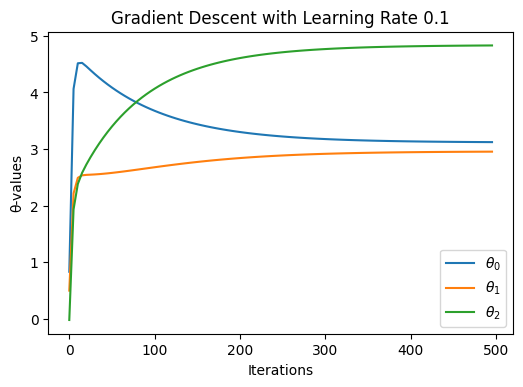

In [24]:
fig, ax = plt.figure(dpi=100), plt.axes()
_ = ax.plot([i for i in range(0, 500, 5)], theta_values_500_iterations)
_ = ax.set(title="Gradient Descent with Learning Rate 0.1", xlabel="Iterations", ylabel="θ-values")
_ = ax.legend(labels=[f"$θ_{0}$", f"$θ_{1}$", f"$θ_{2}$"]) 

b) Do the same as for a) but with learning rate  𝜂=0.01 , 5000 epochs and plot every 20 step. What do you notice when changing the learning rate? (*)

In [27]:
theta_values_5000_iterations = gradient_descent(X, y, iterations=5000, learning_rate=0.01, values_for_plotting=True, step_values_for_plotting=20)

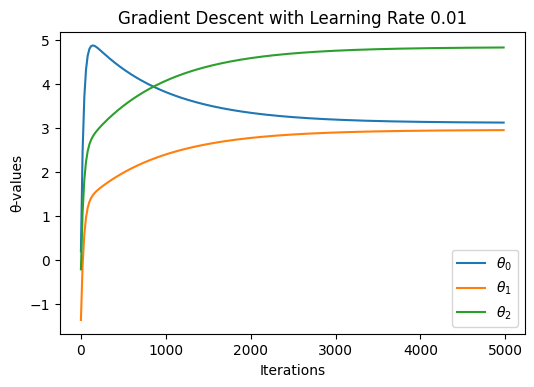

In [29]:
fig, ax = plt.figure(dpi=100), plt.axes()
_ = ax.plot([i for i in range(0, 5000, 20)], theta_values_5000_iterations)
_ = ax.set(title="Gradient Descent with Learning Rate 0.01", xlabel="Iterations", ylabel="θ-values")
_ = ax.legend(labels=[f"$θ_{0}$", f"$θ_{1}$", f"$θ_{2}$"]) 

### 2. Stochastic Gradient Descent - learning rate (**)

Repeat task 1 but using stochastic gradient descent instead. Also adjust number of epochs to see if you can find convergence. What kind of conclusions can you draw from your experiments. (**)

In [47]:
epochs = 500
t0, t1 = 5, 50 #Learning schedule parameters. Scales the learning rate (we do not want it to take the same steps every time, it should take smaller steps at the end)

def learning_rate_schedule(t):
    """Decrease learning rate as training progresses"""
    return t0 / (t + t1) #It will be a smaller number as t increases

theta = np.random.randn(X.shape[1], 1)
theta_values = []

m = len(X)

for epoch in range(epochs):
    for i in range(m): #As many samples as the length
        random_index = np.random.randint(m)
        x_i = X[random_index:random_index+1] #We pick out a random sample
        y_i = y[random_index:random_index+1]
        gradients = 2 * x_i.T.dot(x_i.dot(theta) - y_i) #Same as the equation above gradient = 2 / m * X.T @ (X @ theta - y)
        eta = learning_rate_schedule(epoch * m + i)
        theta -= eta * gradients

    temp = [theta_value for theta_value in theta.reshape(-1)]
    theta_values.append(temp)

theta #Already for 10 epochs we have a good estimate

array([[3.12835874],
       [2.95010674],
       [4.82009528]])

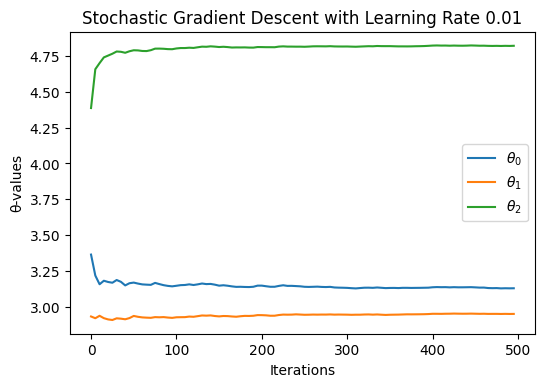

In [49]:
fig, ax = plt.figure(dpi=100), plt.axes()
_ = ax.plot([i for i in range(0, 500, 5)], theta_values[0::5])
_ = ax.set(title="Stochastic Gradient Descent with Learning Rate 0.01", xlabel="Iterations", ylabel="θ-values")
_ = ax.legend(labels=[f"$θ_{0}$", f"$θ_{1}$", f"$θ_{2}$"]) 